In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
data = pd.read_csv(r'C:\Users\Kumar\Desktop\New folder (2)\NIYATI-TRAINING\Python\EDA\cleaned_dataset.csv')

In [13]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [14]:
print(data['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


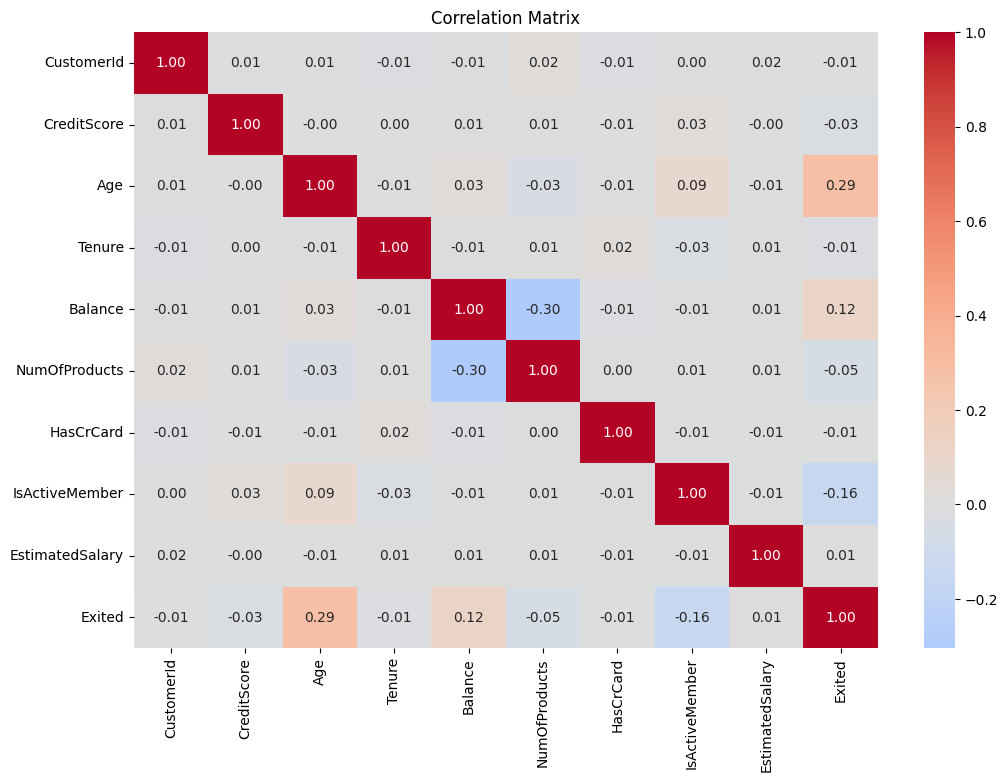

In [21]:

numeric_data = data.select_dtypes(include=['float64', 'int64']).drop(columns=['RowNumber'], errors='ignore')


correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Notable Correlations:
#Age vs. Exited (0.29): There is a moderate positive correlation between Age and Exited. This suggests that older customers are somewhat more likely to exit the bank.
#NumOfProducts vs. Balance (-0.30): There is a negative correlation here, implying that customers with fewer products tend to have higher balances.
#IsActiveMember vs. Exited (-0.16): This shows a mild negative correlation, indicating that active members are less likely to exit.
#Balance vs. Exited (0.12): A positive correlation suggests that customers with higher balances are slightly more likely to exit, though the correlation is weak

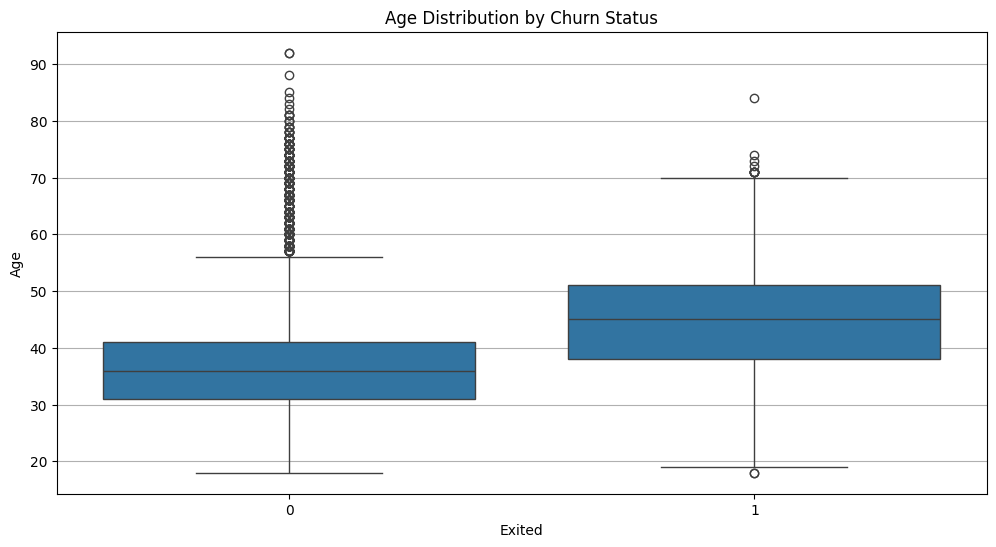

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

In [17]:
correlation_matrix.to_csv('correlation_matrix.csv', index=True)
correlation_matrix.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
